In [13]:
from typing import *
import matplotlib.pyplot as plt
import random
from enum import Enum

In [14]:
class MemoryBlock:
    """Class to represent a memory block"""

    def __init__(self, size: int):
        self.size = size
        self.allocated = False
        self.process_id = None

In [15]:
class Process:
    """Class to represent a process"""


    def __init__(self, process_id: int, size: int):
        self.process_id = process_id
        self.size = size

In [16]:
def visualize_memory(memory_blocks: List[MemoryBlock], title: str):
    """Visualize the memory blocks and allocations."""

    fig, ax = plt.subplots(figsize=(10, 2))

    colors = []
    labels = []
    for block in memory_blocks:
        if block.allocated:
            colors.append('lightgreen')
            labels.append(f"P{block.process_id}\n({block.size})")
        else:
            colors.append('lightgray')
            labels.append(f"Free\n({block.size})")

    ax.bar(range(len(memory_blocks)), [block.size for block in memory_blocks],
           color=colors, edgecolor='black', tick_label=labels)
    ax.set_title(title)
    plt.show()

In [17]:
def first_fit(memory_blocks: List[MemoryBlock], process: Process):
    """Allocate memory using the First Fit strategy."""

    for block in memory_blocks:
        if not block.allocated and block.size >= process.size:
            block.allocated = True
            block.process_id = process.process_id
            return True
    return False

In [18]:
def best_fit(memory_blocks: List[MemoryBlock], process: Process):
    """Allocate memory using the Best Fit strategy."""

    best_block = None
    for block in memory_blocks:
        if not block.allocated and block.size >= process.size:
            if best_block is None or block.size < best_block.size:
                best_block = block

    if best_block:
        best_block.allocated = True
        best_block.process_id = process.process_id
        return True
    return False

In [19]:
def worst_fit(memory_blocks: List[MemoryBlock], process: Process):
    """Allocate memory using the Worst Fit strategy."""

    worst_block = None
    for block in memory_blocks:
        if not block.allocated and block.size >= process.size:
            if worst_block is None or block.size > worst_block.size:
                worst_block = block

    if worst_block:
        worst_block.allocated = True
        worst_block.process_id = process.process_id
        return True
    return False

In [20]:
class EAlgorithms(Enum):
    FIRST_FIT = 1
    BEST_FIT = 2
    WORST_FIT = 3

In [21]:
def simulate_memory_allocation(algorithm: EAlgorithms):
    # Define memory blocks (random sizes)
    memory_blocks = [MemoryBlock(random.randint(10, 50)) for _ in range(8)]

    # Define processes (random sizes)
    processes = [Process(pid, random.randint(5, 30)) for pid in range(1, 5)]

    print("Initial Memory Blocks:")
    visualize_memory(memory_blocks, "Initial Memory State")

    for process in processes:
        print(f"Allocating Process {process.process_id} (Size: {process.size})")

        # Uncomment one of the following allocation strategies to test
        match algorithm:
            case EAlgorithms.FIRST_FIT:
                allocated = first_fit(memory_blocks, process)
            case EAlgorithms.BEST_FIT:
                allocated = best_fit(memory_blocks, process)
            case EAlgorithms.WORST_FIT:
                allocated = worst_fit(memory_blocks, process)

        if allocated:
            print(f"Process {process.process_id} allocated successfully.")
        else:
            print(f"Process {process.process_id} could not be allocated.")

        # Visualize memory after each allocation
        visualize_memory(memory_blocks, f"After Allocating Process {process.process_id}")

Initial Memory Blocks:


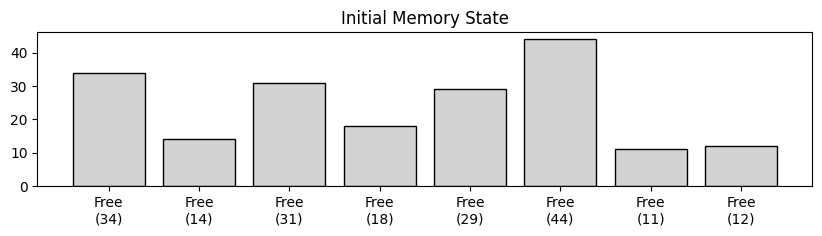

Allocating Process 1 (Size: 28)
Process 1 allocated successfully.


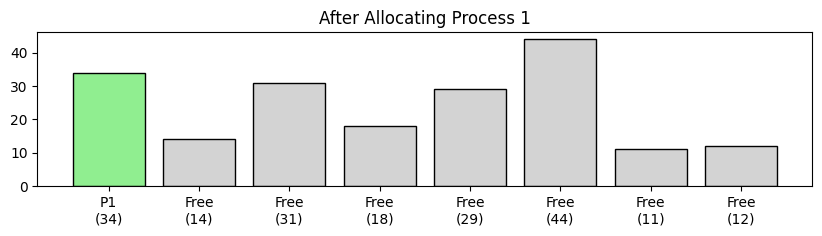

Allocating Process 2 (Size: 5)
Process 2 allocated successfully.


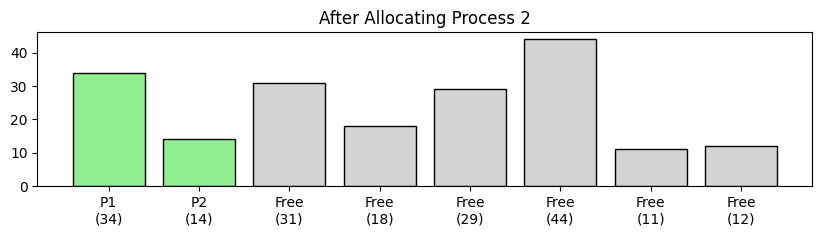

Allocating Process 3 (Size: 10)
Process 3 allocated successfully.


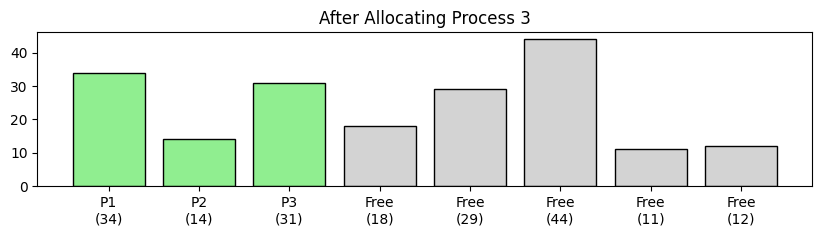

Allocating Process 4 (Size: 17)
Process 4 allocated successfully.


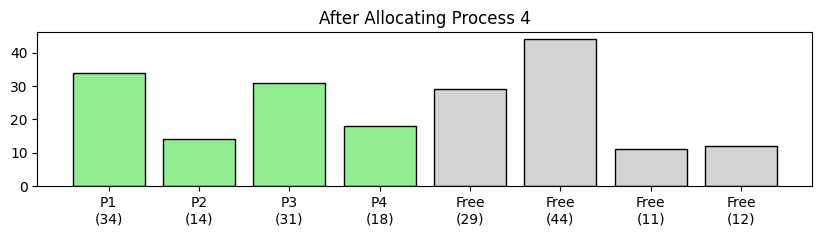

In [22]:
simulate_memory_allocation(EAlgorithms.FIRST_FIT)

Initial Memory Blocks:


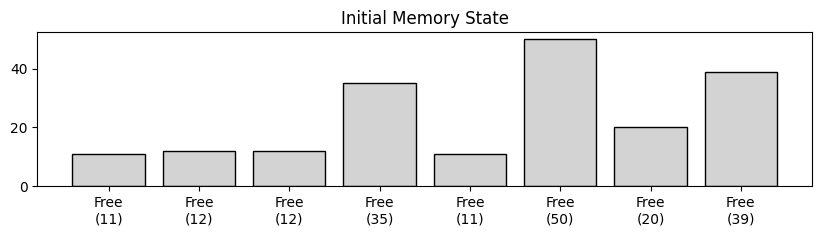

Allocating Process 1 (Size: 24)
Process 1 allocated successfully.


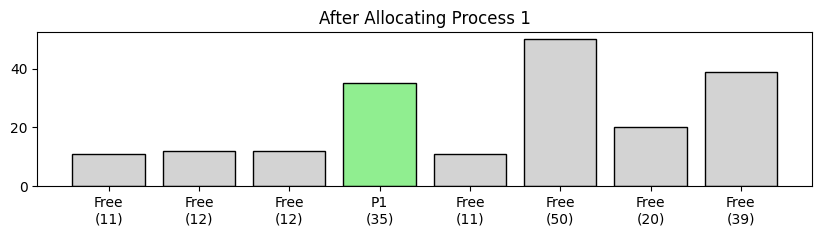

Allocating Process 2 (Size: 18)
Process 2 allocated successfully.


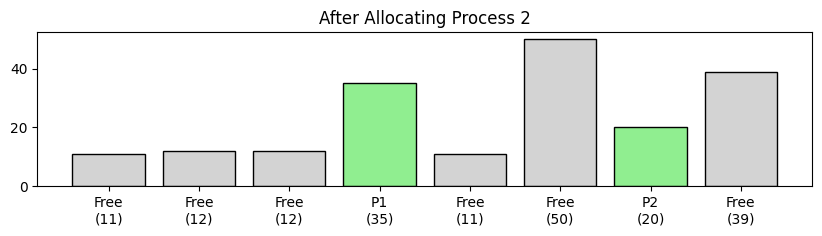

Allocating Process 3 (Size: 26)
Process 3 allocated successfully.


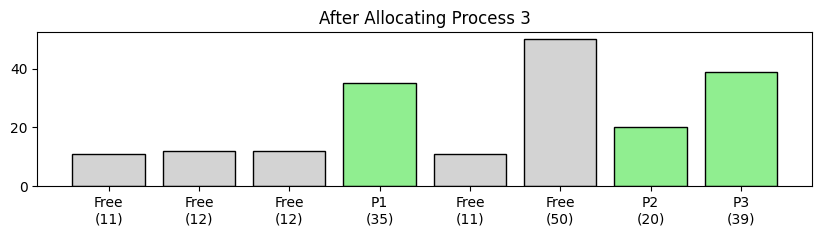

Allocating Process 4 (Size: 24)
Process 4 allocated successfully.


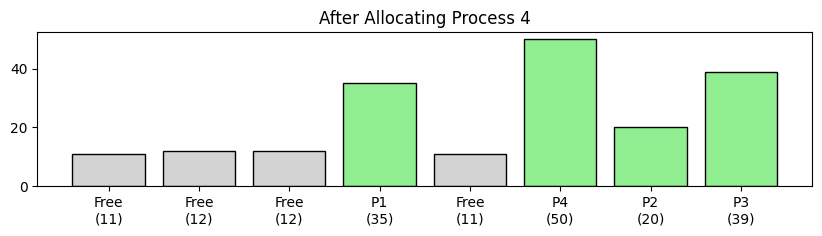

In [23]:
simulate_memory_allocation(EAlgorithms.BEST_FIT)

Initial Memory Blocks:


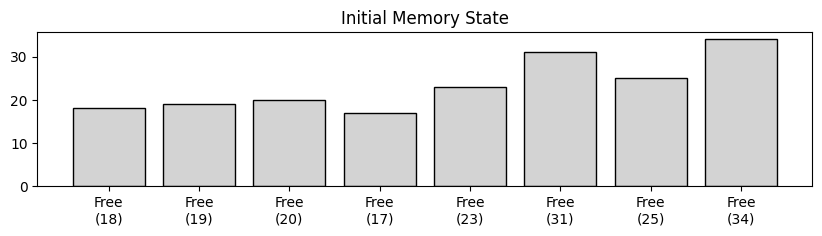

Allocating Process 1 (Size: 20)
Process 1 allocated successfully.


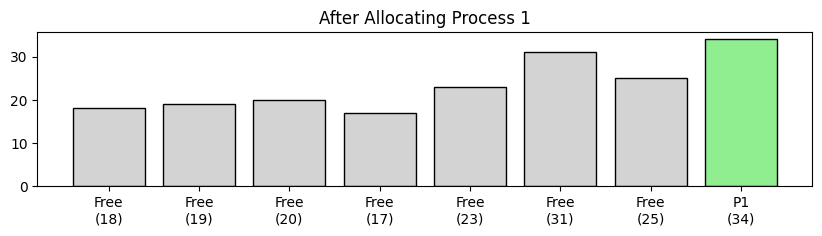

Allocating Process 2 (Size: 10)
Process 2 allocated successfully.


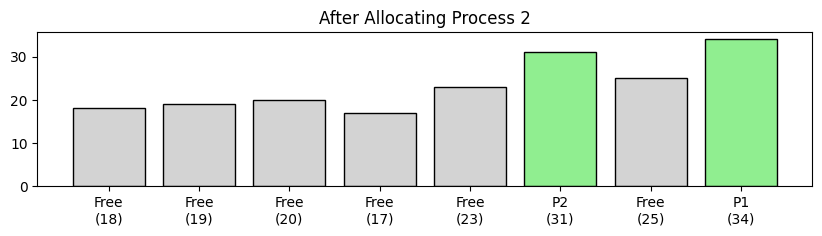

Allocating Process 3 (Size: 5)
Process 3 allocated successfully.


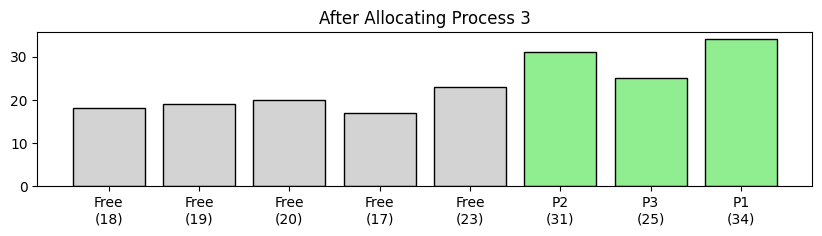

Allocating Process 4 (Size: 15)
Process 4 allocated successfully.


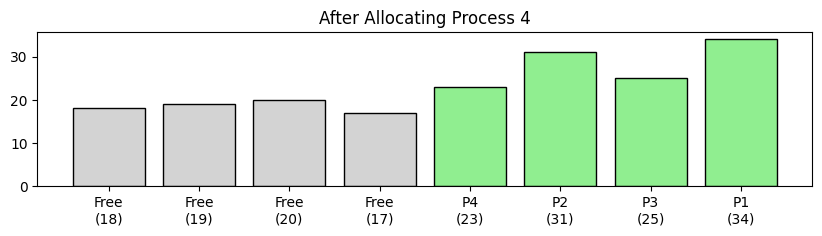

In [24]:
simulate_memory_allocation(EAlgorithms.WORST_FIT)